## 파라미터 추정: 손실(함수)의 최소화

### 손실함수

- 파라미터 추정을 할 때 손실을 최소화하는 목적으로 사용

### 잔차

- 실제 종속변수값과 모델 예측값의 차이 $ ( y_i - \hat{y}_i ) $



In [1]:
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats
from matplotlib import pyplot as plt
import seaborn as sns

import random as rd
#sns.set()

%precision 3
%matplotlib inline

In [20]:
beer_data = pd.read_csv("./beer_sales.csv")
beer_data.head()

,Temperature,Sales
0,3,36.5
1,4,44.0
2,5,40.5
3,6,58.0
4,7,47.5


Text(0, 0.5, 'Sales')

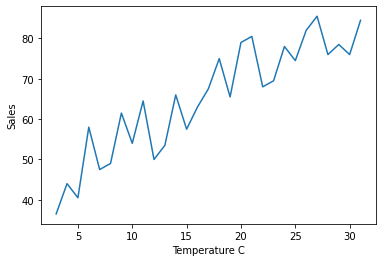

In [11]:
plt.plot(beer_data["Temperature"], beer_data["Sales"])
plt.xlabel("Temperature C")
plt.ylabel("Sales")

In [12]:
def predict_sales(w, b, temp=beer_data["Temperature"]):
    return w * temp + b

In [13]:
predict_sales(0.5, 40)

0     41.5
1     42.0
2     42.5
3     43.0
4     43.5
5     44.0
6     44.5
7     45.0
8     45.5
9     46.0
10    46.5
11    47.0
12    47.5
13    48.0
14    48.5
15    49.0
16    49.5
17    50.0
18    50.5
19    51.0
20    51.5
21    52.0
22    52.5
23    53.0
24    53.5
25    54.0
26    54.5
27    55.0
28    55.5
Name: Temperature, dtype: float64

### 손실함수
- 파라미터 추정 시 
- 잔차합으로 두는 경우
- 잔차의 제곱합으로 두는 경우

#### 맥주매상의 예

$$ 맥주매상 \sim \mathcal{N} \left ( \beta_0 + \beta_1 \times 기온, \sigma^2 \right ) $$

### 최소제곱법
- 잔차의 제곱합을 최소화하는 파라미터로 모델을 선정하는 것 


MSE: 184.88763382758617


Text(0, 0.5, 'Sales')

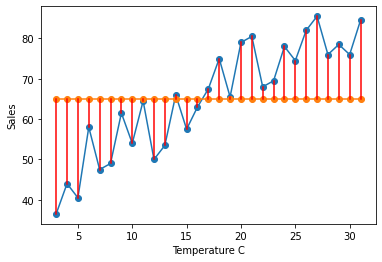

In [22]:
w = 0
b = 65.017

resid = np.sum((beer_data["Sales"] - predict_sales(w, b))**2)
print(f'MSE: {resid / len(beer_data)}')

plt.plot(beer_data["Temperature"], beer_data["Sales"], marker="o")
plt.plot(beer_data["Temperature"], predict_sales(w, b), marker="o")

pred = predict_sales(w, b)
for i in range(len(beer_data["Temperature"])):
    plt.plot(np.array([beer_data["Temperature"][i], beer_data["Temperature"][i]]), np.array([beer_data["Sales"][i], pred[i]]), color="red")

plt.xlabel("Temperature C")
plt.ylabel("Sales")

In [15]:
np.mean(beer_data["Sales"])

65.01724137931035

MSE: 33.43195262068966


Text(0, 0.5, 'Sales')

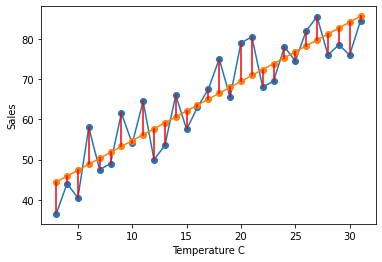

In [23]:
w = 1.471
b = 40.011

resid = np.sum((beer_data["Sales"] - predict_sales(w, b))**2)
print(f'MSE: {resid / len(beer_data)}')

plt.plot(beer_data["Temperature"], beer_data["Sales"], marker="o")
plt.plot(beer_data["Temperature"], predict_sales(w, b), marker="o")

pred = predict_sales(w, b)
for i in range(len(beer_data["Temperature"])):
    plt.plot(np.array([beer_data["Temperature"][i], beer_data["Temperature"][i]]), np.array([beer_data["Sales"][i], pred[i]]), color="red")

plt.xlabel("Temperature C")
plt.ylabel("Sales")

In [17]:
from scipy.optimize import minimize

In [18]:
def get_resid(X, target=beer_data["Sales"]):
    a = X[0]
    b = X[1]

    return np.sum((target - predict_sales(a, b))**2)

In [19]:
init_guess = np.array([1, 1])
minimize(get_resid, init_guess, method="BFGS", options={'gtol': 1e-5, 'disp': True})

Optimization terminated successfully.
         Current function value: 969.526601
         Iterations: 6
         Function evaluations: 39
         Gradient evaluations: 13


      fun: 969.5266009852238
 hess_inv: array([[ 0.   , -0.003],
       [-0.003,  0.058]])
      jac: array([-7.629e-06,  0.000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 39
      nit: 6
     njev: 13
   status: 0
  success: True
        x: array([ 1.471, 40.011])

### 최소제곱법과 최대우도법의 관계

$$ \underset{\beta_0, \beta_1}{\text{arg max}} \log \mathcal{L} =  \underset{\beta_0, \beta_1}{\text{arg max}}  \sum_{i=1}^{N} \left [ \log \left ( \frac{1}{\sqrt{2 \pi \sigma^2}} - \frac{\left ( y_i - (\beta_0 + \beta_1 x_i )  \right )^2 }{2 \sigma^2} \right ) \right ]  $$
- 로그우도를 최대화하는 것은 위의 식을 최대화하는 것이며, 아래 그림에서 각 $x_i$에 해당하는 우도(pdf)의 합을 최대화하는 것을 의미함.
- 이는 최소제곱법의 손실함수에 -를 붙인 것과 같아서, 최소제곱법의 손실함수를 최소화하는 것은 그 음수값인 로그우도합을 최대화하는 것은 같다.
- (-로그우도)=오차함수
![image.png](attachment:image.png "wolfpack.hnu.ac.kr에서 다운로드")

- 잔차제곱합을 손실함수로 정의한 정규선형모델에서는 잔차제곱법으로 최대우도법을 이용한 추정치와 같은 파라미터 추정
- 모집단이 정규분포외의 분포인 경우는 서로 다름.
  - 예. 이항분포를 따르는 동전의 앞뒷면 나오는 수
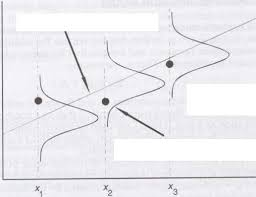

## 예측정확도의 평가와 변수 선택

- 변수선택 방법에는 
  - 검증을 사용하는 방법 (책에서는 검정)
  - 정보 기준을 사용하는 방법
  
### 적합도와 예측정확도

- **적합도** : 가지고 있는 데이터에 대해 모델을 적용했을 때 정확도
- **예측정확도** : 모델의 파라미터 산정에 사용하지 않은 데이터에 모델을 적용했을 때의 정확도

- 로그우도, 잔차제곱합을 사용함 

### 과적합(Overfitting)
- 적합도는 높은 데, 예측정확도는 낮은 경우

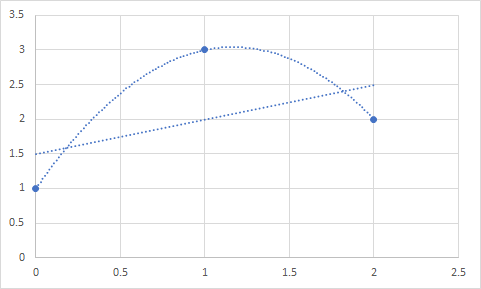

### 변수선택의 의미
- 고려하는 변수를 늘리면 적합도는 늘 개선되므로, 추가 변수를 도입할 때는 주의해야 함
- 필요없는 독립변수를 제외함으로써 예측정확도를 높이는 것을 의미함 

### 일반화 오차
- 모델 파라미터 산정에 사용되지 않은 데이터에 대한 예측오차

### 훈련데이터와 테스트 데이터
- **훈련 데이터**: 파라미터 추정에 사용되는 데이터
- **테스트 데이터**: 일반화 오차를 평가하기 위해 파라미터 추정을 할 때 사용하지 않고 남겨둔 데이터

### 교차검증
- **교차검증**: 데이터를 일정한 규칙에 따라 훈련데이터와 테스트 데이터로 나누어 테스트 데이터에 대한 예측정확도를 평가하는 방법
  - 리브-p-아웃 교차검증 (leave-p-out Cross Validation): 
      - p개의 데이터를 테스트 데이터로 쓰고 나머지를 훈련데이터로 쓰는 방법 (책에는 잘못 설명되어 있음)
  - K겹 교차검증 (K-fold Cross Validation): 
      - 가지고 있는 데이터를 K개의 그룹으로 나누고,
      - 그 중 하나를 테스트 데이터로 나머지는 훈련 데이터로 사용
      - K번 반복하여 예측정확도의 평균값을 평가
      
- 변수 선택 아이디어 중 하나는 이 교차검증을 사용하여 예측정확도를 평가하고, 이를 최대화하는 조합의 변수의 조합으로 모델을 선정함
  - 계산량은 많아짐: 잠재적인 모델수 만큼 반복해야 함(하지만 컴퓨터가 하는 것이라 문제없음)
  


### 아카이케 정보기준 (Akaike Information Criteria;AIC)

$$ AIC = -2 \times (최대로그우도-추정된 파라미터 수) $$

- AIC가 작을수록 좋은 모델
- 변수가 많아지면 적합도는 좋아지지만 예측정확도는 낮아지므로 이에 대한 페널티를 주어 추가 변수 도입을 저지함
- AIC 낮은 모델을 선택하면 예측정확도 개선의 가능성이 있음
- 교차검증에 비하여 계산량이 작음
